In [ ]:
# SARIMAX 실습
# 현 시간에서 일정 시간 이전의 값을 빼서 계산(p), 현재 시간에서 앞 시간을 뺀 값(d), 에러(q)

In [22]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from datetime import datetime
from dateutil.relativedelta import relativedelta
import time, calendar

import holidays
from pytimekr import pytimekr

In [29]:
# 테슬라 주식 관련 데이터
df = pd.read_csv('./day03_data/TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-09-18,25.350000,25.974001,25.178667,25.666668,25.666668,107820000
1,2017-09-19,25.333332,25.492666,24.904667,25.006666,25.006666,96778500
2,2017-09-20,24.866667,25.216667,24.738001,24.927334,24.927334,73786500
3,2017-09-21,24.993334,25.122000,24.300667,24.431999,24.431999,69273000
4,2017-09-22,24.432667,24.660000,23.392000,23.406000,23.406000,122391000
...,...,...,...,...,...,...,...
1254,2022-09-12,300.720001,305.489990,300.399994,304.420013,304.420013,48674600
1255,2022-09-13,292.899994,297.399994,290.399994,292.130005,292.130005,68229600
1256,2022-09-14,292.239990,306.000000,291.640015,302.609985,302.609985,72628700
1257,2022-09-15,301.829987,309.119995,300.720001,303.750000,303.750000,64795500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,121.335986,124.135435,118.313505,121.313569,121.313569,1.320049e+08
std,118.689726,121.405477,115.647051,118.567328,118.567328,9.025711e+07
min,12.073333,12.445333,11.799333,11.931333,11.931333,2.940180e+07
25%,20.811667,21.127333,20.350667,20.781666,20.781666,7.542375e+07
50%,47.387333,49.579334,45.799999,48.302666,48.302666,1.016115e+08
75%,233.383331,238.436661,227.154999,233.135002,233.135002,1.526895e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [32]:
# 윗부분에서 df.info()를 통해 Date 컬럼이 Object인것을 확인
# df 변수에 Date, Close 컬럼을 넣어주고 Date 컬럼을 Datetime 데이터 형식으로 변환

df = df[['Date', 'Close']]
df['Date'] = pd.to_datetime(df['Date'])
print(df.info())
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1259 non-null   datetime64[ns]
 1   Close   1259 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.8 KB
None


,Date,Close
0,2017-09-18,25.666668
1,2017-09-19,25.006666
2,2017-09-20,24.927334
3,2017-09-21,24.431999
4,2017-09-22,23.406000
5,2017-09-25,22.999332
6,2017-09-26,23.016666
7,2017-09-27,22.731333
8,2017-09-28,22.639999
9,2017-09-29,22.740000


In [33]:
# Date 컬럼 자체를 인덱스로 변환
df = df.set_index('Date')
df.head(20)

,Close
Date,
2017-09-18,25.666668
2017-09-19,25.006666
2017-09-20,24.927334
2017-09-21,24.431999
2017-09-22,23.406000
2017-09-25,22.999332
2017-09-26,23.016666
2017-09-27,22.731333
2017-09-28,22.639999


In [34]:
# asfreq 옵션 중 D(Daily) 로 변환 실행
# ==> Datetime 의 열에 비어있는 날짜 인덱스에 날짜를 채워준다
df = df.asfreq(freq='D', method='ffill')
df.head(20)

,Close
Date,
2017-09-18,25.666668
2017-09-19,25.006666
2017-09-20,24.927334
2017-09-21,24.431999
2017-09-22,23.406000
2017-09-23,23.406000
2017-09-24,23.406000
2017-09-25,22.999332
2017-09-26,23.016666


In [8]:
# ffill(forward fill) 옵션으로 전의 값을 null 위치를 채운다
df = df.fillna(method = 'ffill')
df.head(10)

,Close
Date,
2017-09-18,25.666668
2017-09-19,25.006666
2017-09-20,24.927334
2017-09-21,24.431999
2017-09-22,23.406000
2017-09-23,23.406000
2017-09-24,23.406000
2017-09-25,22.999332
2017-09-26,23.016666


In [9]:
# index reset
df = df.reset_index()
df

,Date,Close
0,2017-09-18,25.666668
1,2017-09-19,25.006666
2,2017-09-20,24.927334
3,2017-09-21,24.431999
4,2017-09-22,23.406000
...,...,...
1820,2022-09-12,304.420013
1821,2022-09-13,292.130005
1822,2022-09-14,302.609985
1823,2022-09-15,303.750000


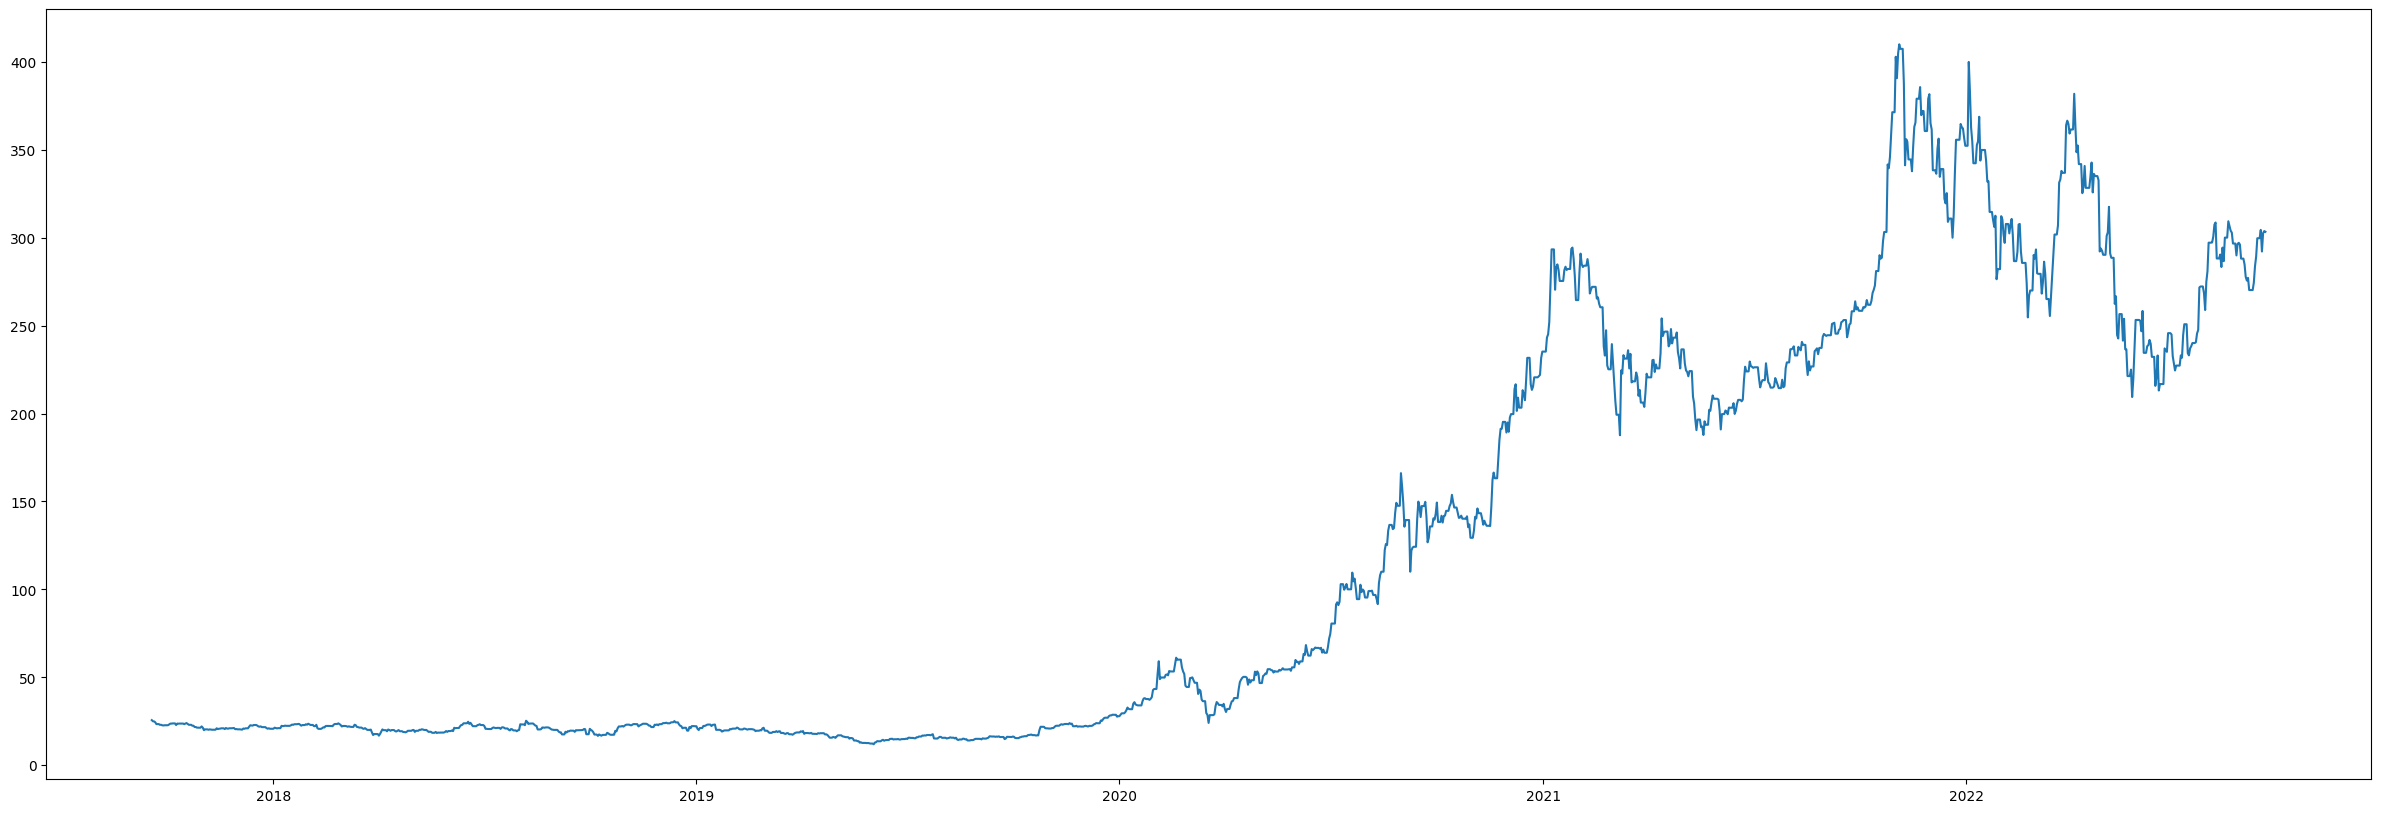

In [10]:
plt.figure(figsize = (30, 10))
plt.plot(df['Date'], df['Close'])
plt.show()

In [18]:
# Train, Test 데이터셋 분리
ref_date = '2022-09-01'
train = df.loc[df['Date'] < ref_date]   
test = df.loc[df['Date'] >= ref_date]
test

,Date,Close
1809,2022-09-01,277.160004
1810,2022-09-02,270.209991
1811,2022-09-03,270.209991
1812,2022-09-04,270.209991
1813,2022-09-05,270.209991
1814,2022-09-06,274.420013
1815,2022-09-07,283.700012
1816,2022-09-08,289.260010
1817,2022-09-09,299.679993
1818,2022-09-10,299.679993


In [12]:
# === ARIMA 모델 생성 ===
p = 1   # 며칠 전까지의 y값을 예측?
d = 1   # 비정상성 데이터일경우 차분을 몇회?
q = 1   # MA 며칠 전까지의 에러값을 가지고 예측?

# === S 시즌이 들어갈 경우 ===
P = 1   # 몇 시즌 전까지의 y값을 가지고 예측?
D = 1   # 몇 시즌 전까지의 차분?
Q = 0   # 몇 시즌 전까지의 에러값을 가지고 예측?
M = 0   # 시즌 분할 개수

if P>0 or D>0 or Q>0:
    M = 7

y = train['Close']
model = sm.tsa.statespace.SARIMAX(y, trend = 'ct', order = (p, d, q), seasonal_order = (P,D,Q,M))
result = model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.35096D+00    |proj g|=  1.07039D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      1     17      1     0     0   1.070D-01   3.351D+00
  F =   3.3509633361465156     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [13]:
print(result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1809
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 7)   Log Likelihood               -6061.893
Date:                            Thu, 10 Aug 2023   AIC                          12135.785
Time:                                    08:19:34   BIC                          12168.762
Sample:                                         0   HQIC                         12147.958
                                           - 1809                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0328      1.219      0.027      0.979      -2.357       2.423
drift      -4.912e-05      0.001   

In [14]:
test_pred = result.forecast(steps = 7)
test_pred = pd.DataFrame(test_pred)
test_pred

,predicted_mean
1809,274.588333
1810,267.449325
1811,267.387185
1812,267.323463
1813,262.243694
1814,261.905929
1815,261.121741


In [19]:
test['pred'] = test_pred['predicted_mean']
test

/var/folders/gv/vm6kxypx5zj3_r1_rx94xndm0000gn/T/ipykernel_8632/1829903816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred'] = test_pred['predicted_mean']


,Date,Close,pred
1809,2022-09-01,277.160004,274.588333
1810,2022-09-02,270.209991,267.449325
1811,2022-09-03,270.209991,267.387185
1812,2022-09-04,270.209991,267.323463
1813,2022-09-05,270.209991,262.243694
1814,2022-09-06,274.420013,261.905929
1815,2022-09-07,283.700012,261.121741
1816,2022-09-08,289.260010,NaN
1817,2022-09-09,299.679993,NaN
1818,2022-09-10,299.679993,NaN


In [20]:
test['diff'] = test['pred'] - test['Close']
test

/var/folders/gv/vm6kxypx5zj3_r1_rx94xndm0000gn/T/ipykernel_8632/1721767853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['diff'] = test['pred'] - test['Close']


,Date,Close,pred,diff
1809,2022-09-01,277.160004,274.588333,-2.571671
1810,2022-09-02,270.209991,267.449325,-2.760666
1811,2022-09-03,270.209991,267.387185,-2.822806
1812,2022-09-04,270.209991,267.323463,-2.886528
1813,2022-09-05,270.209991,262.243694,-7.966297
1814,2022-09-06,274.420013,261.905929,-12.514084
1815,2022-09-07,283.700012,261.121741,-22.578271
1816,2022-09-08,289.260010,NaN,NaN
1817,2022-09-09,299.679993,NaN,NaN
1818,2022-09-10,299.679993,NaN,NaN


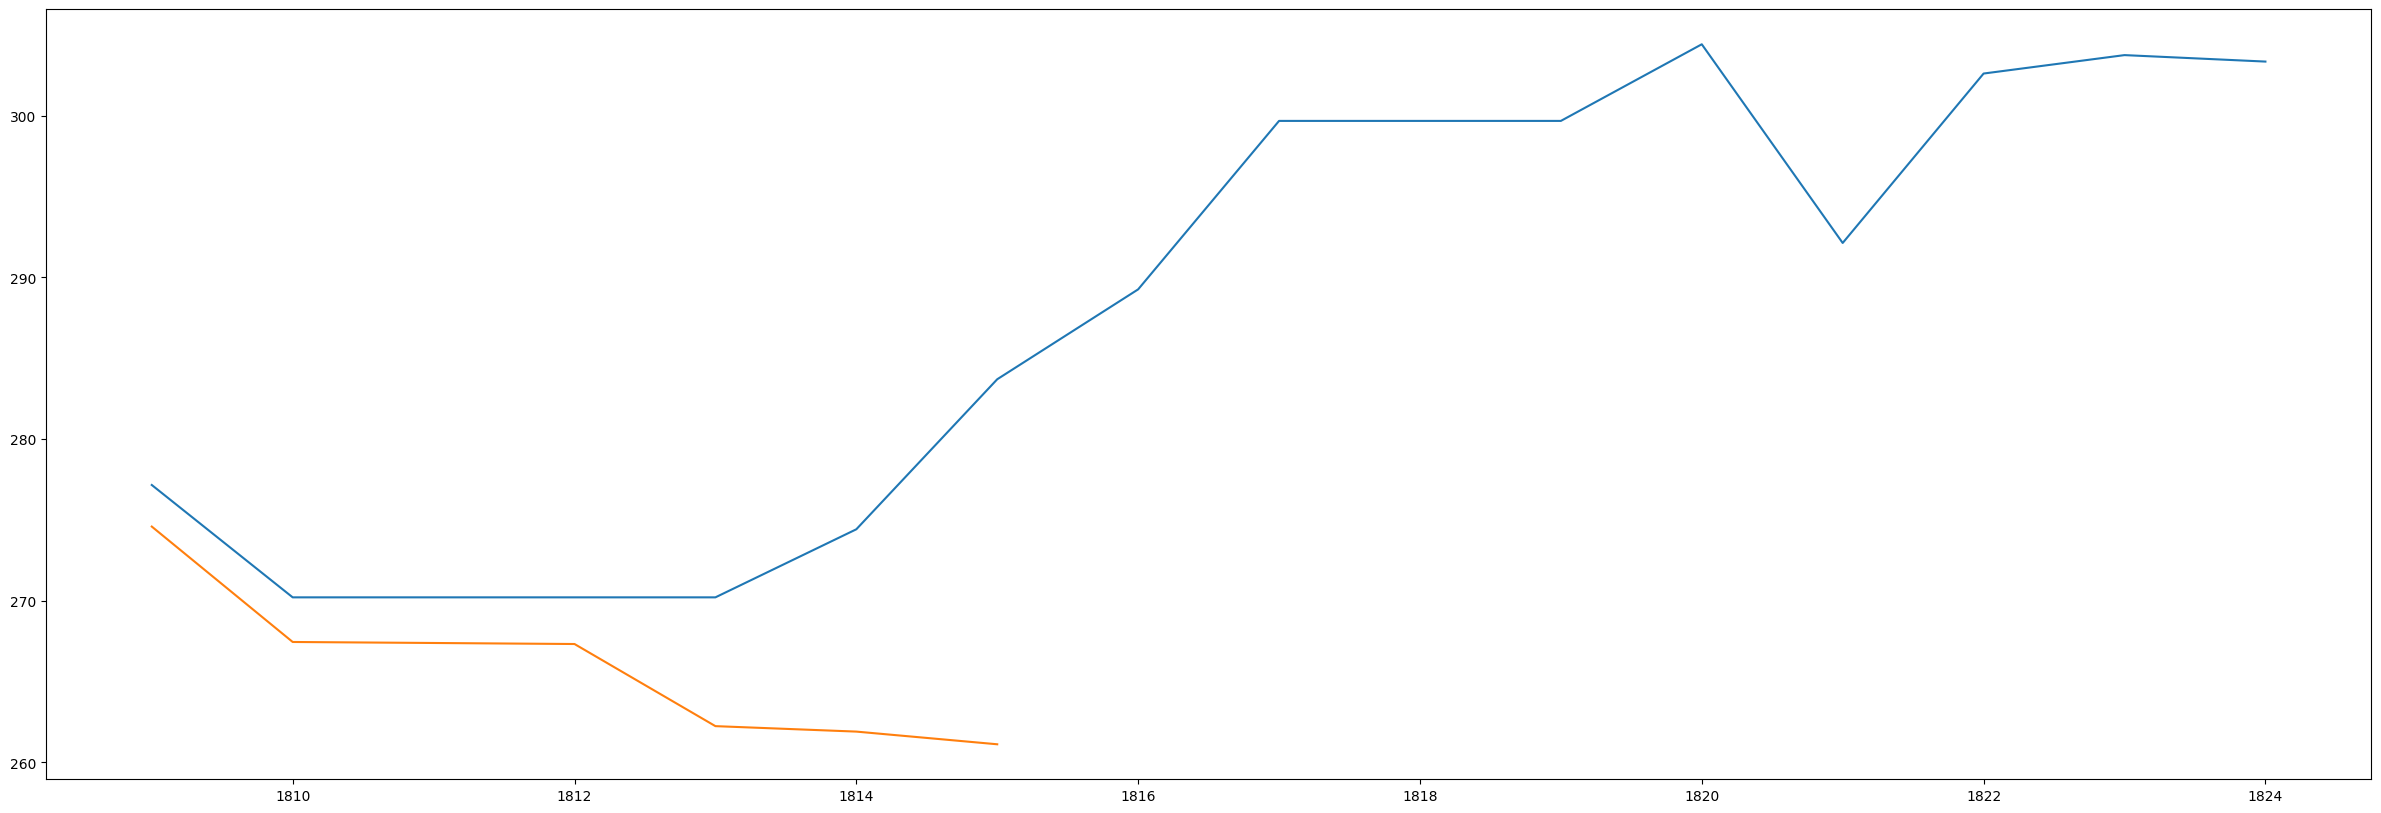

In [21]:
plt.figure(figsize = (30, 10))
plt.plot(test['Close'])
plt.plot(test['pred'])
plt.show()